# Assignment: Visualization
### `! git clone https://github.com/ds3001f25/visualization_assignment.git`
### Do Q1 and Q2.

**Q1.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use the pretrail data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# Defining function

def kd_func(data, bandwidth=None, kernel="gaussian", num_points=100):
    data = np.asarray(data)
    n = len(data)

    if bandwidth is None:
        bandwidth = 1.06 * data.std() * n**(-1/5)

    # Setting bandwith: Silverman's rule

    x_grid = np.linspace(data.min() - bandwidth, data.max() + bandwidth, num_points)

    # Grid of x values, eval points for KDE

    distance_matrix = (x_grid[:, None] - data) / bandwidth

    # Creating distance matrix to compute scaled differences between x vals and data

    if kernel == "gaussian":
        K = np.exp(-0.5 * distance_matrix**2) / np.sqrt(2*np.pi)
    elif kernel == "uniform":
        K = 0.5 * (np.abs(distance_matrix) <= 1)
    elif kernel == "epanechnikov":
        K = 0.75 * (1 - distance_matrix**2) * (np.abs(distance_matrix) <= 1)
    else:
        raise ValueError("Choose: gaussian, uniform, or epanechnikov")

    # Setting options for kernel

    density = K.mean(axis=1) / bandwidth
    return x_grid, density

In [45]:
# Pretrial Data

df = pd.read_csv('./visualization_assignment/data/pretrial_data.csv')
df.head()

,Unnamed: 0,case_type,age,sex,race,is_poor,bond,bond_type,prior_F,prior_M,gini,released,sentence_type,sentence,bond_NA,held_wo_bail,sentence_NA
0,0,F,31.0,M,W,NaN,NaN,7,0.0,0.0,0.44,NaN,NaN,NaN,True,False,True
1,1,F,60.0,M,B,NaN,NaN,7,13.0,21.0,0.44,0.0,0.0,60.000000,True,False,False
2,2,M,27.0,M,W,NaN,NaN,7,0.0,0.0,0.44,0.0,1.0,12.000000,True,False,False
3,3,M,27.0,M,B,0.0,NaN,7,0.0,9.0,0.44,0.0,1.0,0.985626,True,False,False
4,4,F,28.0,F,W,0.0,NaN,7,0.0,0.0,0.44,1.0,4.0,0.000000,True,False,True


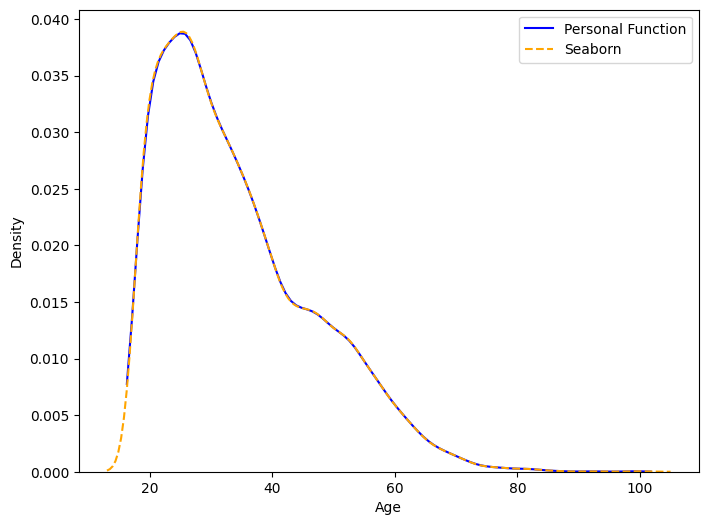

In [59]:
# Comparison with Seaborn Plot

data = df["age"].dropna()
x, y = kd_func(data, kernel="gaussian")

plt.figure(figsize=(8,6))
plt.plot(x, y, label="Personal Function", color="blue")
sns.kdeplot(data, label="Seaborn", color="orange", linestyle="--")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()

**Q2.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [5]:
#1

!git clone https://github.com/miacachion/visualization_assignment.git

df = pd.read_csv('./visualization_assignment/data/college_completion.csv')

Cloning into 'visualization_assignment'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 19 (delta 3), reused 1 (delta 1), pack-reused 12 (from 1)
Receiving objects: 100% (19/19), 1.92 MiB | 1.59 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [6]:
#2

df.shape
df.columns

# Dimensions: 3798 observations, 63 variables

# Variables included: 'index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
#       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
#       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
#       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
#       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
#       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
#       'endow_value', 'endow_percentile', 'grad_100_value',
#       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
#       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
#       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
#       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
#       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
#       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
#       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first',
#       'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer',
#       'vsa_enroll_after4_transfer', 'vsa_enroll_elsewhere_after4_transfer',
#       'vsa_grad_after6_transfer', 'vsa_grad_elsewhere_after6_transfer',
#       'vsa_enroll_after6_transfer', 'vsa_enroll_elsewhere_after6_transfer',
#       'similar', 'state_sector_ct', 'carnegie_ct', 'counted_pct', 'nicknames',
#       'cohort_size'

df.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [7]:
#3

pd.crosstab(df['control'], df['level'])

# Patterns noticed: Across this data set 2-year universities are most commonly public and 4-year universities most commonly private not-for-profit
#                   Smallest recorded value is 2-year private not-for-profit, highest recorded value is 4-year private not-for-profit

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


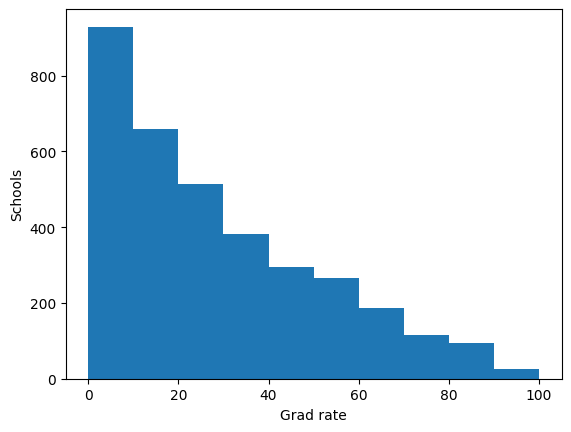

In [8]:
#4

# Histogram

plt.hist(df['grad_100_value'])
plt.xlabel('Grad rate')
plt.ylabel('Schools')
plt.show()

<Axes: ylabel='Density'>

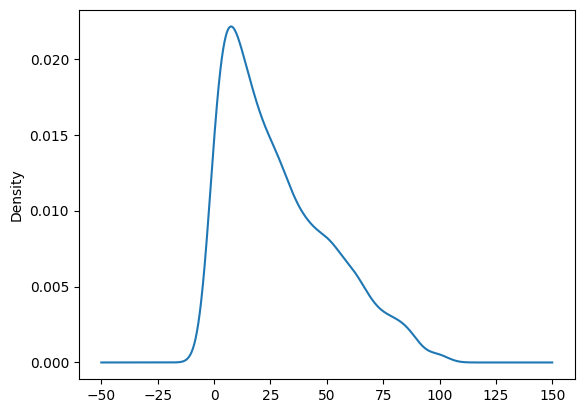

In [16]:
# Kernel Density Plot

var='grad_100_value'
df[var].plot.density()

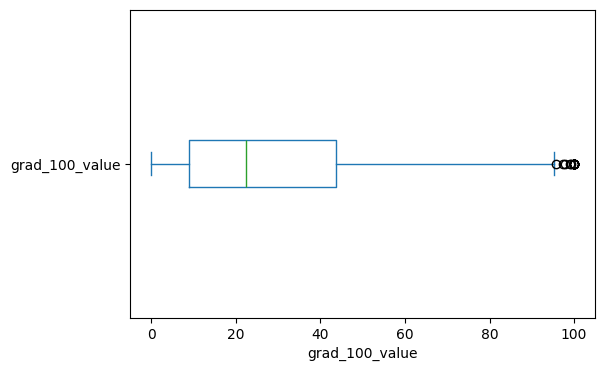

In [17]:
# Box Plot

df['grad_100_value'].plot.box(figsize=(6,4), vert=False)
plt.xlabel('grad_100_value')
plt.show()

In [18]:
# Statistical Description

df['grad_100_value'].describe()

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  


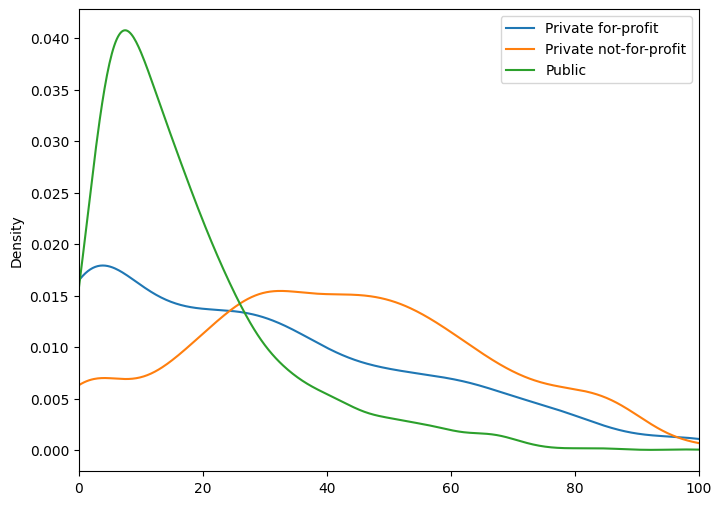

In [24]:
#5

# Kernel Density Plot by Control

plt.figure(figsize=(8,6))
for name, group in df.groupby("control"):
    group[var].plot.density(label=name)
    plt.xlim(0,100)
    plt.legend()

# Density is concentrated around 10% graduation rate for public institutions and around 40% for Private not-for-profit institutions, more spread out for Private for profit

print(df.groupby("control")[var].describe())

# Generally best/highest graduation rates for Private non-for-profit

         count       mean        std  min   25%   50%     75%    max
level                                                               
2-year  1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year  2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0


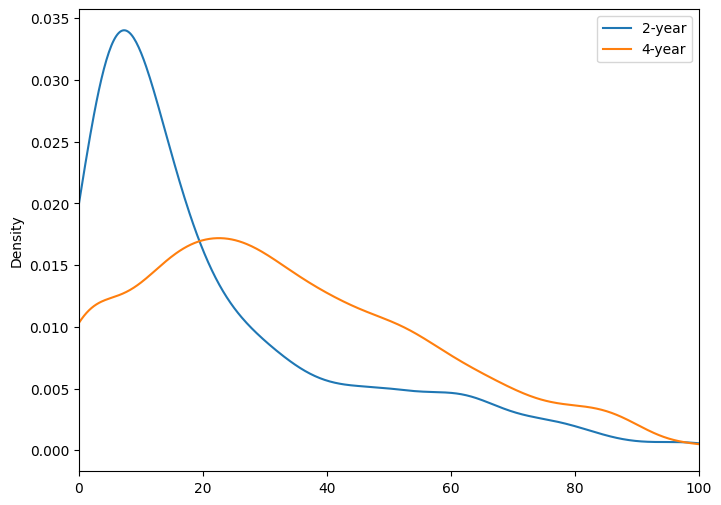

In [25]:
# Kernel Density Plot by Level

plt.figure(figsize=(8,6))
for name, group in df.groupby("level"):
    group[var].plot.density(label=name)
    plt.xlim(0,100)
    plt.legend()

# Density is concentrated around 10% graduation rate for 2-year institutions and 25% for 4-year institutions

print(df.groupby("level")[var].describe())

# Generally best/highest graduation rates for 4-year schools

                                 count       mean        std  min     25%  \
levelXcontrol                                                               
2-year, Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
2-year, Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
2-year, Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year, Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
4-year, Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
4-year, Public                   573.0  25.561082  16.403902  0.0  13.600   

                                 50%     75%    max  
levelXcontrol                                        
2-year, Private for-profit      33.9  57.800  100.0  
2-year, Private not-for-profit  44.4  61.200  100.0  
2-year, Public                   9.4  16.175   97.8  
4-year, Private for-profit      12.5  26.325  100.0  
4-year, Private not-for-profit  41.0  57.800  100.0  
4-yea

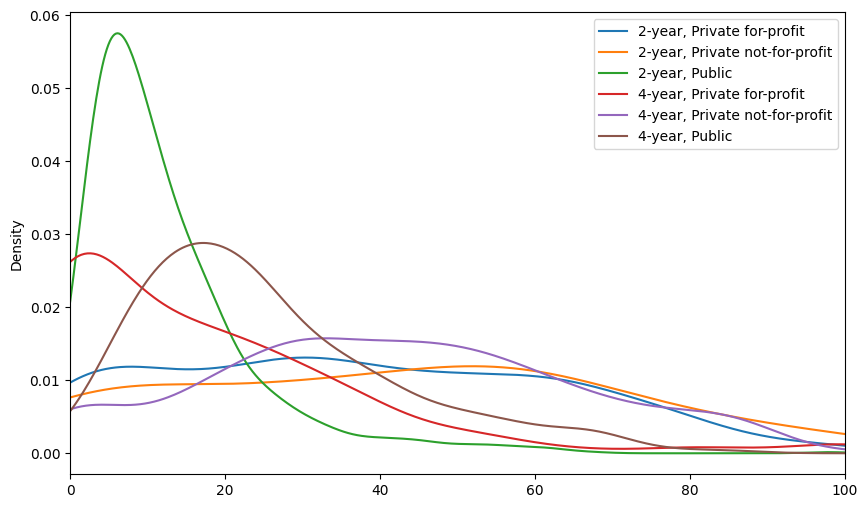

In [27]:
#6

df["levelXcontrol"] = df["level"] + ", " + df["control"]

plt.figure(figsize=(10,6))
for name, group in df.groupby("levelXcontrol"):
    group[var].plot.density(label=name)
    plt.xlim(0,100)
    plt.legend()

print(df.groupby("levelXcontrol")[var].describe())

# Generally best/highest graduation rates for 2-year, Private not-for-profit and 4-year, Private not-for-profit

                                 count       mean        std  min     25%  \
levelXcontrol                                                               
2-year, Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
2-year, Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
2-year, Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year, Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
4-year, Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
4-year, Public                   573.0  25.561082  16.403902  0.0  13.600   

                                 50%     75%    max  
levelXcontrol                                        
2-year, Private for-profit      33.9  57.800  100.0  
2-year, Private not-for-profit  44.4  61.200  100.0  
2-year, Public                   9.4  16.175   97.8  
4-year, Private for-profit      12.5  26.325  100.0  
4-year, Private not-for-profit  41.0  57.800  100.0  
4-yea

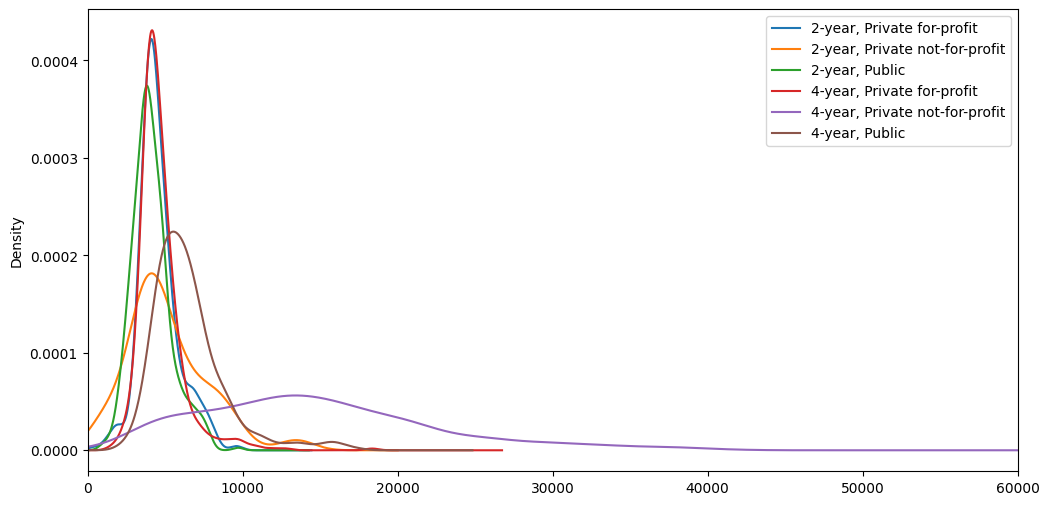

In [31]:
#7

var2 = "aid_value"

plt.figure(figsize=(12,6))
for name, group in df.groupby("levelXcontrol"):
    group[var2].plot.density(label=name)
    plt.xlim(0,60000)
    plt.legend()

print(df.groupby("levelXcontrol")[var].describe())

# Shape of graph explained by varying tuition costs

(0.0, 43659.0)

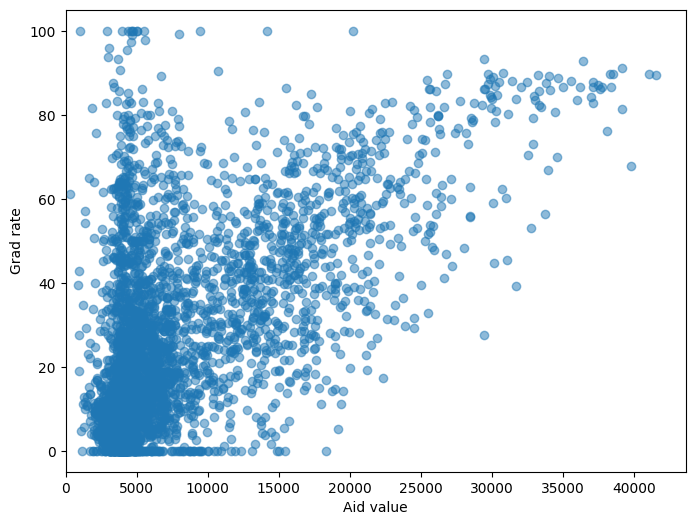

In [34]:
#8

# No grouping

plt.figure(figsize=(8,6))
plt.scatter(df['aid_value'], df['grad_100_value'], alpha=0.5)
plt.xlabel("Aid value")
plt.ylabel("Grad rate")
plt.xlim(0, df['aid_value'].max()*1.05)

# Generally positive increasing relationship, as graudation rates increase, so do aid values

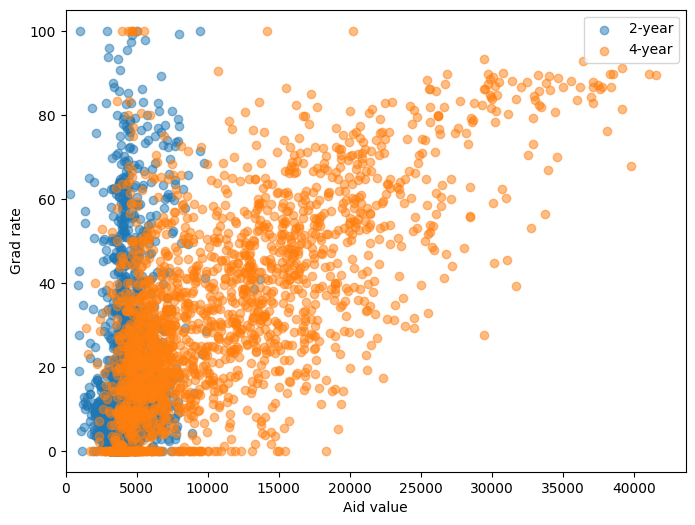

In [37]:
# Grouped by Level

plt.figure(figsize=(8,6))
for name, group in df.groupby("level"):
    plt.scatter(group['aid_value'], group['grad_100_value'], alpha=0.5, label=name)
plt.xlabel("Aid value")
plt.ylabel("Grad rate")
plt.xlim(0, df['aid_value'].max()*1.05)
plt.legend()

# Same positive increasing relationship displayed

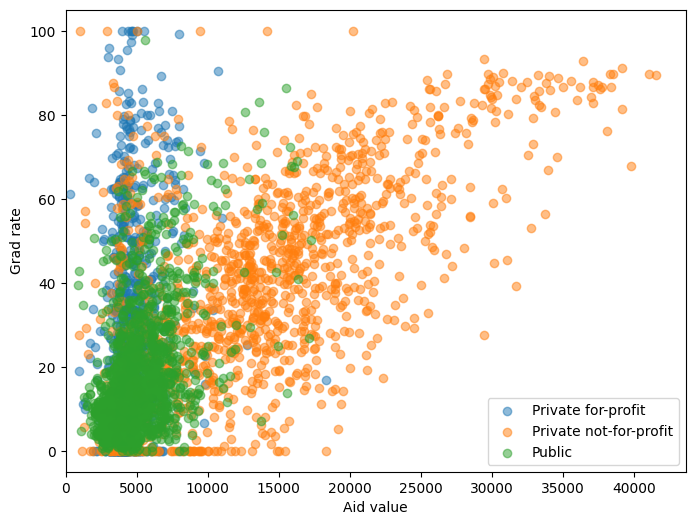

In [38]:
# Grouped by Control

plt.figure(figsize=(8,6))
for name, group in df.groupby("control"):
    plt.scatter(group['aid_value'], group['grad_100_value'], alpha=0.5, label=name)
plt.xlabel("Aid value")
plt.ylabel("Grad rate")
plt.xlim(0, df['aid_value'].max()*1.05)
plt.legend()

# Same positive increasing relationship displayed
# Aid seems to increase graduation rates most for 4-year private not-for-profit instutions, where tuition is likely higher

Academic Integrity: AI used for troubleshooting purposes for this assignment